# Time Series Classification Algorithms - (6) Convolution Based

<div style="border: 1px solid #007acc; background-color: #e6f4ff; padding: 10px; border-radius: 5px; color: black;">
  <strong>📘 Info:</strong> I do not claim ownership of the content in this notebook. It is based on official <a href="https://www.aeon-toolkit.org/en/latest/examples.html" target="_blank">aeon tutorials</a>, and parts of the code or text may have been copy-pasted or adapted directly from those or other sources for learning purposes.
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

from sklearn import metrics

import time

In [3]:
from aeon.datasets import load_classification
from aeon.utils.discovery import all_estimators

# all_estimators("classifier", tag_filter={"algorithm_type": "convolution"})

In [4]:
from aeon.classification.convolution_based import (
    Arsenal,
    HydraClassifier,
    MiniRocketClassifier,
    MultiRocketClassifier,
    RocketClassifier,
)

In [5]:
DATASET_NAMES = [
    "MelbournePedestrian",
    "ArrowHead",
    "Colposcopy"
]

X_train_dict, y_train_dict = {}, {}
X_test_dict, y_test_dict = {}, {}

accuracy_dict, f1_score_dict, duration_dict = {}, {}, {}

for dataset_name in DATASET_NAMES: 
    X_train_dict[dataset_name], y_train_dict[dataset_name] = load_classification(
        dataset_name, split="train"
    )
    X_test_dict[dataset_name], y_test_dict[dataset_name] = load_classification(
        dataset_name, split="test"
    )

    X_train_dict[dataset_name] = X_train_dict[dataset_name].squeeze(1)
    X_test_dict[dataset_name] = X_test_dict[dataset_name].squeeze(1)

    accuracy_dict[dataset_name] = {}
    f1_score_dict[dataset_name] = {}
    duration_dict[dataset_name] = {}

```bibtex
@inbook{faouzi2024,
  author = {Johann Faouzi},
  title = {Time Series Classification: A Review of Algorithms and Implementations},
  year = {2024},
  month = {March},
  booktitle = {Advances in Time Series Analysis and Forecasting},
  publisher = {IntechOpen},
  isbn = {978-0-85466-053-7},
  doi = {10.5772/intechopen.1004810},
}
```

"Convolutional neural networks, containing several convolutional layers, have been investigated for time series classification. The values of the convolutional layers are trainable parameters that are optimized by stochastic gradient descent or a variant thereof. Convolutional neural networks have a large number of trainable parameters in comparison with more classic algorithms such as logistic regression or support vector machines, thus usually requiring a large sample size to find good values for the trainable parameters." \cite{faouzi2024}

```bibtex
@article{middlehurst2024,
  author = {Middlehurst, Matthew and Sch{\"a}fer, Patrick and Bagnall, Anthony},
  title = {Bake Off Redux: A Review and Experimental Evaluation of Recent Time Series Classification Algorithms},
  journal = {Data Mining and Knowledge Discovery},
  volume = {38},
  pages = {1958--2031},
  year = {2024},
  doi = {10.1007/s10618-024-01022-1},
  url = {https://doi.org/10.1007/s10618-024-01022-1}
}
```

"Kernel/Convolution classifiers use convolutions with kernels, which can be seen as subseries used to derive discriminatory features. Each kernel is convolved with a time series through a sliding dot product creating an activation map. Technically, each convolution creates a series to series transform from time series to the activation map. The main difference between convolutions and shapelets is that shapelets are subseries from the training data whereas convolutions are found from the entire space of possible real-values. Convolution based TSC algorithms follow a standard pipeline pattern depicted in figure below." \cite{middlehurst2024}

<img src="images/06_convolution.png" style="width:600px; border: 1px solid #ccc; border-radius: 5px;">

"The activation map is formed for each convolution, followed by pooling operations to extract one relevant feature for each operation. The resulting features are then concatenated to form a single feature vector. Finally, a Ridge classifier is trained on the output to classify the data. The relation ﬂowchart for convolution based algorithms is below." \cite{middlehurst2024}

<img src="images/06_convolution2.png" style="width:600px; border: 1px solid #ccc; border-radius: 5px;">

A convolution is a subseries that is used to create features for a time series. To do this, a convolution is run along a series, and the dot product is calculated. This creates a new series (often called an activation map or feature map) where large values correspond to a close correlation to the convolution.

<img src="images/06_convolution3.png" style="width:600px; border: 1px solid #ccc; border-radius: 5px;">

https://www.aeon-toolkit.org/en/stable/examples/classification/convolution_based.html#Convolution-based-time-series-classification-in-aeon

## 1. Random Convolutional Kernel Transform (ROCKET)

```bibtex
@article{dempster2020,
  author = {Angus Dempster and François Petitjean and Geoffrey I. Webb},
  title = {ROCKET: Exceptionally Fast and Accurate Time Series Classification Using Random Convolutional Kernels},
  journal = {Data Mining and Knowledge Discovery},
  volume = {34},
  number = {5},
  pages = {1454--1495},
  year = {2020},
  publisher = {Springer}
}
```

Proposed by \cite{dempster2020}.

"This algorithm extracts features from time series using a large number of random convolutional kernels, meaning that all the parameters of all the kernels (length, weights, bias, dilation, and padding) are randomly generated from fixed distributions. Instead of extracting a single feature for each kernel, such as the maximum or the mean, as it is usually performed in convolutional neural networks, two features are extracted: the maximum and the proportion of positive values. The classifier built on top of the transformation is responsible for selecting the most relevant features to perform classification. A ridge regression classifier was originally proposed for several reasons. First, it is highly efficient when the number of classes is high, because the multiclass classification task is treated as a multi-output regression task, with the predicted class corresponding to the output with the highest value; thus, the projection matrix needs to be computed only once. Second, the optimization of the $\lambda$ parameter (controlling the amount of regularization) using leave-one-out cross-validation is also highly efficient. Logistic regression was rather used for data sets in which the number of training time series was much larger than the number of extracted time series due to the better scalability of logistic regression solved with stochastic gradient descent for large numbers of training samples." \cite{faouzi2024}

"The ROCKET algorithm combined with a linear classifier has a much lower computational complexity than the best-performing time series classification algorithms while having a comparable performance. Its reported performance is actually higher on average than the ones of convolutional neural networks on the commonly benchmarked data sets. Given its high predictive performance and low computational time, ROCKET is one of the most prominent transformation algorithms for time series classification." \cite{faouzi2024}

In [6]:
method = "Rocket"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    rocket = RocketClassifier()
    rocket.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    rocket_preds = rocket.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], rocket_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], rocket_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

Rocket
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.92
F1-Score: 0.92
Duration: 5.17 seconds
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.79
F1-Score: 0.78
Duration: 2.21 seconds
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.33
F1-Score: 0.30
Duration: 1.63 seconds


## 2. Mini ROCKET

```bibtex
@inproceedings{dempster2021,
  author = {Angus Dempster and Daniel F. Schmidt and Geoffrey I. Webb},
  title = {MiniRocket: A Very Fast (Almost) Deterministic Transform for Time Series Classification},
  booktitle = {Proceedings of the 27th ACM SIGKDD Conference on Knowledge Discovery \& Data Mining (KDD'21)},
  year = {2021},
  pages = {248--257},
  address = {New York, NY, USA},
  publisher = {Association for Computing Machinery},
  doi = {10.1145/3447548.3467231},
  url = {https://doi.org/10.1145/3447548.3467231}
}
```

Proposed by \cite{dempster2021}.

"MiniROCKET reduces the randomness of the parameters of the kernels by using a fixed value or sampling from smaller distributions. Moreover, it only extracts the proportion of positive values for each kernel. These modifications also allow for more optimization and lead to a much lower computational complexity while maintaining similar performance." \cite{faouzi2024}

In [7]:
method = "MiniRocket"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    mini_rocket = MiniRocketClassifier()
    mini_rocket.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    mini_rocket_preds = mini_rocket.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], mini_rocket_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], mini_rocket_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

MiniRocket
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.97
F1-Score: 0.97
Duration: 0.60 seconds
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.86
F1-Score: 0.86
Duration: 0.13 seconds
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.36
F1-Score: 0.31
Duration: 0.13 seconds


## 3. Multi ROCKET

```bibtex
@misc{tan2021,
  author = {Ching Wei Tan and Angus Dempster and Christoph Bergmeir and Geoffrey I. Webb},
  title = {MultiRocket: Effective Summary Statistics for Convolutional Outputs in Time Series Classification},
  year = {2021},
  archivePrefix = {arXiv},
  eprint = {2110.02905},
  primaryClass = {cs.LG},
  note = {Available at \url{https://arxiv.org/abs/2110.02905}}
}
```

Proposed by \cite{tan2021}.

"MultiROCKET extends MiniROCKET by extracting possibly several features, leading to a slightly higher computational time but better accuracy. In particular, the authors found that the proportion of positive values and the longest period of consecutive positive values are the most effective features to be extracted from time series convolutional outputs." \cite{faouzi2024}

In [8]:
method = "MultiRocket"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    multi_rocket = MultiRocketClassifier()
    multi_rocket.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    multi_rocket_preds = multi_rocket.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], multi_rocket_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], multi_rocket_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

MultiRocket
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.97
F1-Score: 0.97
Duration: 4.31 seconds
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.87
F1-Score: 0.87
Duration: 1.30 seconds
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.37
F1-Score: 0.32
Duration: 1.39 seconds


## 4. Hydra

```bibtex
@misc{dempster2022,
  author = {Angus Dempster and Daniel F. Schmidt and Geoffrey I. Webb},
  title = {HYDRA: Competing Convolutional Kernels for Fast and Accurate Time Series Classification},
  year = {2022},
  archivePrefix = {arXiv},
  eprint = {2203.13652},
  primaryClass = {cs.LG},
  note = {Available at \url{https://arxiv.org/abs/2203.13652}}
}
```

Proposed by \cite{dempster2022}.

"HYbrid Dictionary-ROCKET Architecture (Hydra) is a model that combines dictionary-based and convolution-based models. It begins by utilizing random convolutional kernels to calculate the activation of time series. These kernels, unlike ROCKET, are arranged into g groups of k kernels each. In each group of k kernels, the activation of a kernel with the input time series is calculated, and we record how frequently this kernel is the best match (counts the highest activation). This results in a k-dimensional count vector for each of the g groups, resulting in a total of $g \times k$ features. To implement Hydra, the time series is convolved with the kernels, and the resulting activation maps are organized into g groups. Next, an (arg)max operation is performed to count the number of best matches, and the counts for each group’s dictionary are increased." \cite{middlehurst2024}

In [9]:
method = "Hydra"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    hydra = HydraClassifier()
    hydra.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    hydra_preds = hydra.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], hydra_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], hydra_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

Hydra
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.93
F1-Score: 0.93
Duration: 2.42 seconds
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.83
F1-Score: 0.83
Duration: 1.05 seconds
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.40
F1-Score: 0.32
Duration: 0.97 seconds


## 5. Arsenal

```bibtex
@article{middlehurst2021,
  author = {Matthew Middlehurst and James Large and Matthew Flynn and Anthony Bagnall},
  title = {HIVE-COTE 2.0: A New Meta Ensemble for Time Series Classification},
  journal = {Machine Learning},
  volume = {110},
  pages = {3211--3243},
  year = {2021},
  doi = {10.1007/s10994-021-05990-4},
  url = {https://doi.org/10.1007/s10994-021-05990-4}
}
```

Proposed by \cite{middlehurst2021}.

An ensemble of ROCKET transformers using RidgeClassifierCV base classifier. Weights each classifier using the accuracy from the ridge cross-validation. Allows for generation of probability estimates at the expense of scalability compared to RocketClassifier.

https://www.aeon-toolkit.org/en/stable/api_reference/auto_generated/aeon.classification.convolution_based.Arsenal.html#aeon.classification.convolution_based.Arsenal

In [10]:
method = "Arsenal"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    arsenal = Arsenal()
    arsenal.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    arsenal_preds = arsenal.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], arsenal_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], arsenal_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

Arsenal
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.91
F1-Score: 0.91
Duration: 30.93 seconds
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.82
F1-Score: 0.81
Duration: 11.14 seconds
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.35
F1-Score: 0.30
Duration: 9.75 seconds


## 6. Comparison between the Classifiers

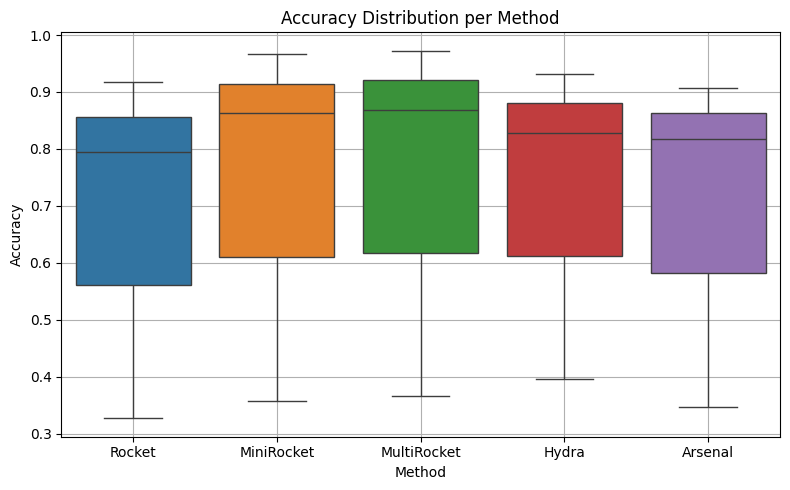

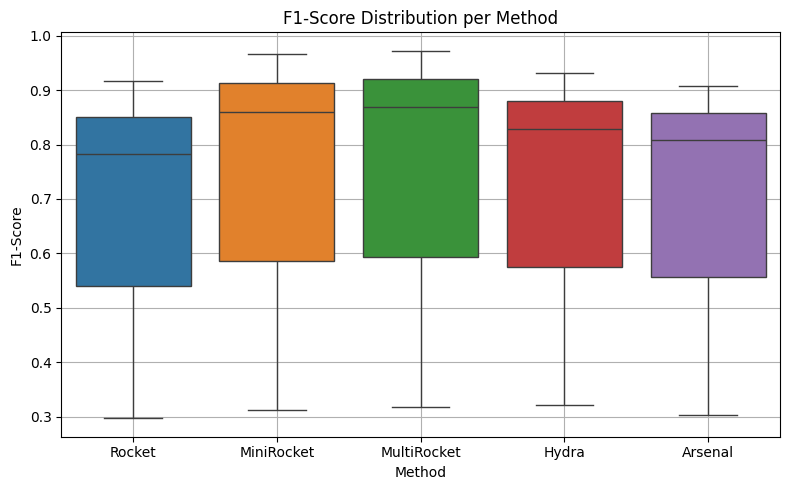

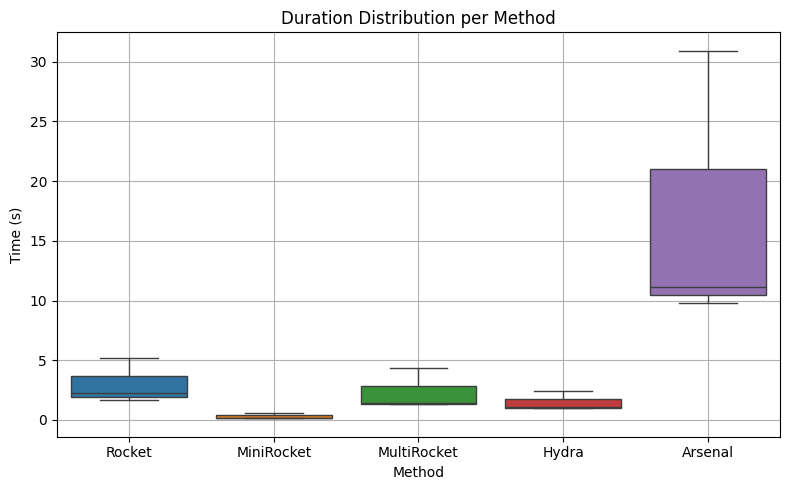

In [11]:
datasets = list(accuracy_dict.keys())
methods = list(next(iter(accuracy_dict.values())).keys())

def prepare_long_format(metric_dict, metric_name):
    records = []
    for ds in datasets:
        for method in methods:
            val = metric_dict[ds][method]
            if isinstance(val, (int, float)):
                records.append({
                    "Dataset": ds,
                    "Method": method,
                    "Metric": float(val),
                    "Type": metric_name
                })
    return pd.DataFrame(records)

df_accuracy = prepare_long_format(accuracy_dict, "Accuracy")
df_f1 = prepare_long_format(f1_score_dict, "F1-Score")
df_duration = prepare_long_format(duration_dict, "Duration (s)")

df_all = pd.concat([df_accuracy, df_f1, df_duration], ignore_index=True)

def plot_boxplot(df, title, ylabel):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="Method", y="Metric", hue="Method")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Method")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_boxplot(df_accuracy, "Accuracy Distribution per Method", "Accuracy")
plot_boxplot(df_f1, "F1-Score Distribution per Method", "F1-Score")
plot_boxplot(df_duration, "Duration Distribution per Method", "Time (s)")